In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles, make_moons, make_swiss_roll
from sklearn import preprocessing
from functools import reduce #To use multiple np.kron

import math

import time

In [99]:
directory_arrays = './Saved_arrays/'

In [100]:
def save_arrays_to_file(arrays, variable_names, filename):
    """
    Saves a list of arrays into a dictionary and exports them to a .npz file.

    Parameters:
    - arrays (list of np.ndarray): The list of arrays to save.
    - variable_names (list of str): The corresponding names for the arrays.
    - filename (str): The file name to save the arrays.
    """
    if len(arrays) != len(variable_names):
        raise ValueError("Number of arrays and variable names must match.")

    array_dict = {name: array for name, array in zip(variable_names, arrays)}
    np.savez(filename, **array_dict)
    print(f"Arrays saved to {filename}")

def load_arrays_from_file(filename):
    """
    Loads arrays from a .npz file and returns a dictionary of them.

    Parameters:
    - filename (str): The file name to load the arrays from.

    Returns:
    - dict: A dictionary where keys are variable names and values are arrays.
    """
    loaded_data = np.load(directory_arrays+filename)
    array_dict = {key: loaded_data[key] for key in loaded_data.files}
    print(f"Arrays loaded from {filename}")
    return array_dict

In [101]:
### CHANGE THE NAME

data = load_arrays_from_file("coh-spi-3-3-20.npz")

Arrays loaded from coh-spi-3-3-20.npz


In [102]:

data.keys()

dict_keys(['N_qfm_arr', 'param_qfm_arr', 'acc_mean', 'acc_std', 'internal_mean', 'internal_std', 'fidelity_mean', 'fidelity_std'])

In [103]:
N_qfm_arr = np.array(data['N_qfm_arr'])
param_qfm_arr = np.array(data['param_qfm_arr'])
acc_mean = np.array(data['acc_mean'])
acc_std = np.array(data['acc_std'])
internal_mean = np.array(data['internal_mean'])
internal_std = np.array(data['internal_std'])
fidelity_mean = np.array(data['fidelity_mean'])
fidelity_std = np.array(data['fidelity_std'])

In [104]:
np.shape(param_qfm_arr)

(80,)

In [105]:
len(np.arange(10, 31, 5, dtype='int'))

5

In [106]:
#N_qfm_arr = np.arange(1, 41, 1, dtype='int')
#param_qfm_arr = np.arange(1, 70, 0.5)

#N_qfm_arr = np.arange(10, 31, 5, dtype='int')
#param_qfm_arr = np.linspace(1, 40, 80)

For N = 10


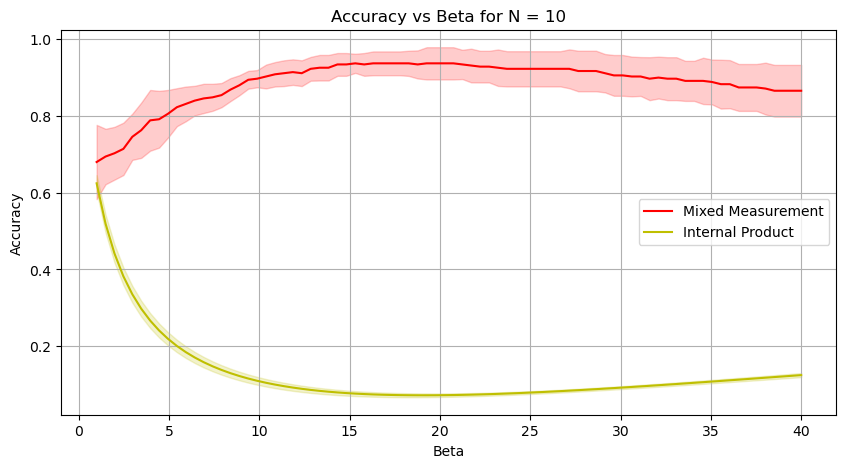

For N = 15


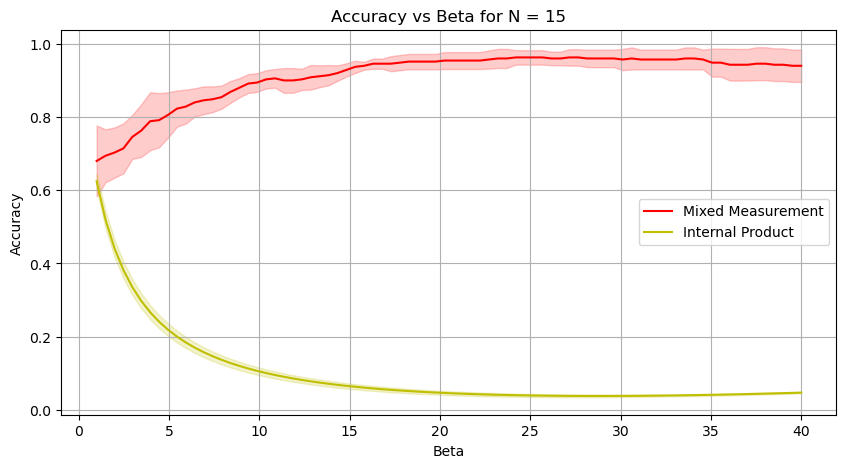

For N = 20


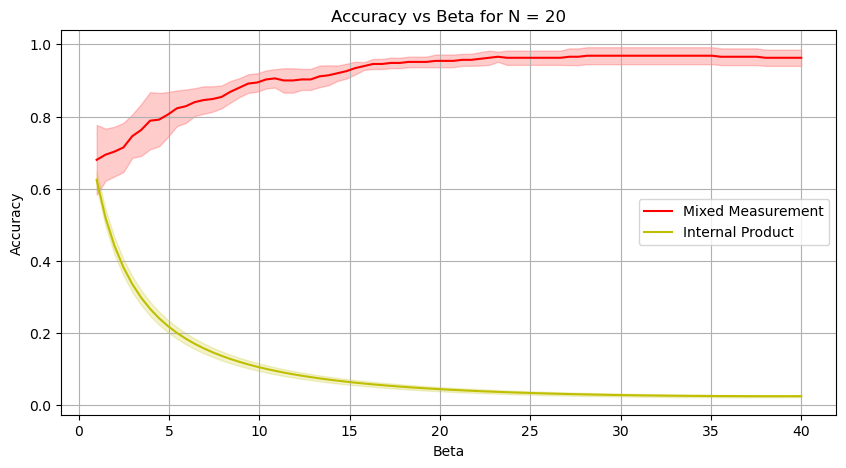

For N = 25


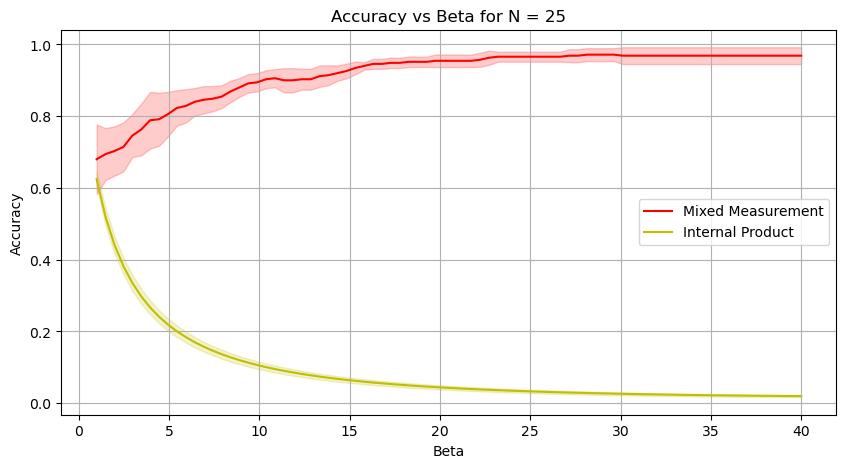

For N = 30


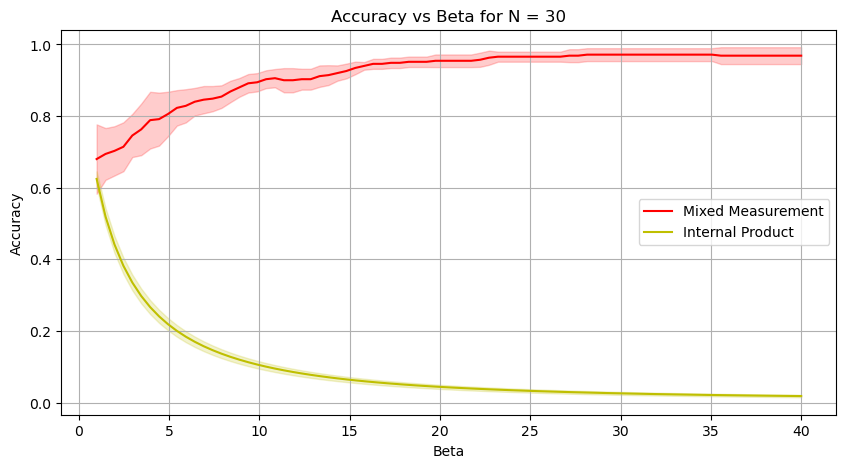

In [107]:
# Plotting Accuracy vs Beta for a fixed N
fixed_N_index = 0
for fixed_N_index in range(len(N_qfm_arr)):
  print(f'For N = {N_qfm_arr[fixed_N_index]}')
  plt.figure(figsize=(10, 5))

  # Plot accuracy for pure measurement
  #plt.plot(param_qfm_arr, acc_mean[fixed_N_index, :, 0], label='Pure Measurement', color='b')
  #plt.fill_between(param_qfm_arr, acc_mean[fixed_N_index, :, 0] - acc_std[fixed_N_index, :, 0],
  #                acc_mean[fixed_N_index, :, 0] + acc_std[fixed_N_index, :, 0], color='b', alpha=0.2)
  # Plot accuracy for mixed measurement
  plt.plot(param_qfm_arr, acc_mean[fixed_N_index, :, 1], label='Mixed Measurement',color='r')
  plt.fill_between(param_qfm_arr, acc_mean[fixed_N_index, :, 1] - acc_std[fixed_N_index, :, 1],
                  acc_mean[fixed_N_index, :, 1] + acc_std[fixed_N_index, :, 1], color='r', alpha=0.2)
  # Plot accuracy for diagonal of mixed measurement
  #plt.plot(param_qfm_arr, acc_mean[fixed_N_index, :, 2], label='Clasical Measurement', color='g')
  #plt.fill_between(param_qfm_arr, acc_mean[fixed_N_index, :, 2] - acc_std[fixed_N_index, :, 2],
  #                acc_mean[fixed_N_index, :, 2] + acc_std[fixed_N_index, :, 2], color='g', alpha=0.2)
  # Plot internal product average
  plt.plot(param_qfm_arr, internal_mean[fixed_N_index, :], label='Internal Product', color='y')
  plt.fill_between(param_qfm_arr, internal_mean[fixed_N_index, :] - internal_std[fixed_N_index, :],
                  internal_mean[fixed_N_index, :] + internal_std[fixed_N_index, :], color='y', alpha=0.2)
  # Plot fidelity average
  #plt.plot(param_qfm_arr, fidelity_mean[fixed_N_index, :], label='Fidelity', color='m')
  #plt.fill_between(param_qfm_arr, fidelity_mean[fixed_N_index, :] - fidelity_std[fixed_N_index, :],
  #                fidelity_mean[fixed_N_index, :] + fidelity_std[fixed_N_index, :], color='m', alpha=0.2)

  plt.title(f'Accuracy vs Beta for N = {N_qfm_arr[fixed_N_index]}')
  plt.xlabel('Beta')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.grid(True)
  plt.show()

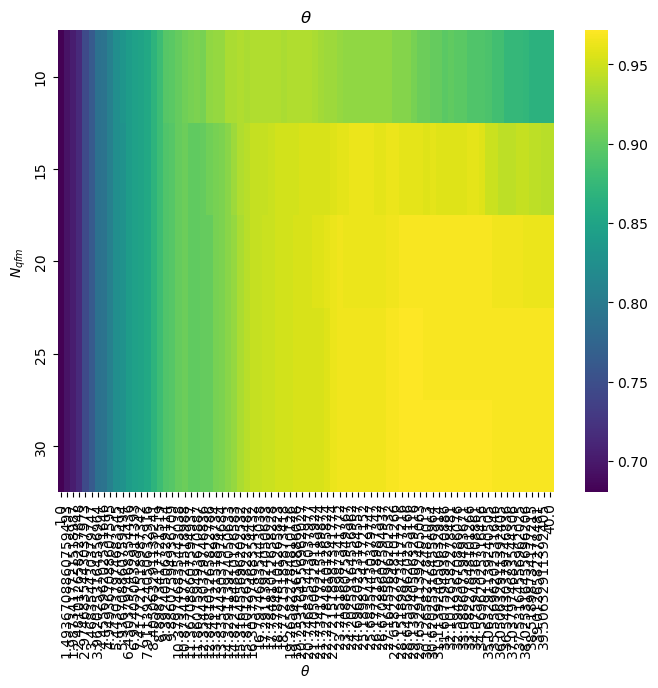

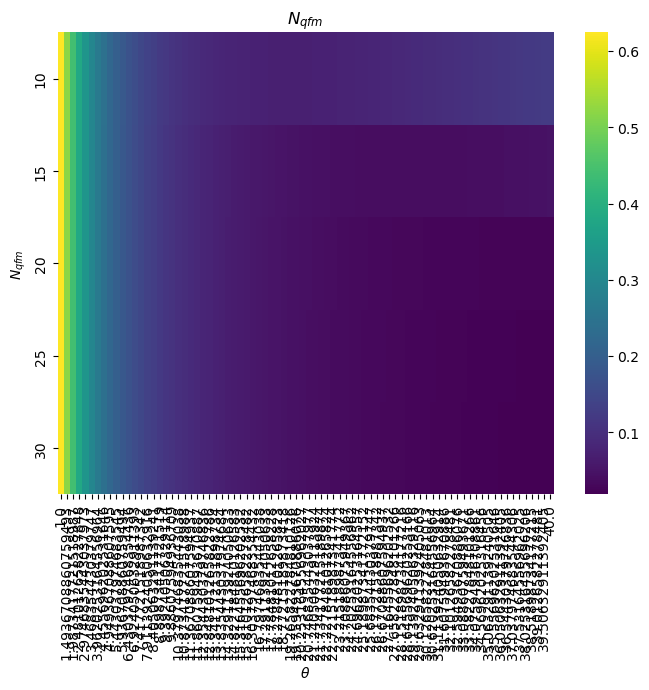

In [110]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot heatmap
def plot_heatmap(data, x_labels, y_labels, title, xlabel, ylabel):
    plt.figure(figsize=(8, 6))
    sns.heatmap(data, xticklabels=x_labels, yticklabels=y_labels, cmap="viridis")#, annot=True, fmt=".2f")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

# Heatmap for acc_mean[:, :, 1]
plot_heatmap(acc_mean[:, :, 1], param_qfm_arr, N_qfm_arr, r"$\theta$", r"$\theta$", r"$N_{qfm}$")

# Heatmap for internal_mean
plot_heatmap(internal_mean, param_qfm_arr, N_qfm_arr, r"$N_{qfm}$", r"$\theta$", r"$N_{qfm}$")


In [109]:
"""""### SAVING


# Get the current time as a time struct
current_time = time.localtime()

# Extract individual components
month = current_time.tm_mon  # Month (1-12)
day = current_time.tm_mday   # Day of the month (1-31)
hour = current_time.tm_hour  # Hour (0-23)
minute = current_time.tm_min # Minute (0-59)


arrays = [N_qfm_arr,param_qfm_arr,acc_mean, acc_std, internal_mean, internal_std, fidelity_mean, fidelity_std]
variable_names = ['N_qfm_arr','param_qfm_arr','acc_mean', 'acc_std', 'internal_mean', 'internal_std', 'fidelity_mean', 'fidelity_std']

qfm_name = 'squ'#(quantum_feature_map.__name__)[:3]
dataset_name = 'spi'#(dataset_generator.__name__)[9:12]
print(qfm_name)
print(dataset_name)
filename = qfm_name + '-' + dataset_name + f'-{day}-{month}-{hour}'
filename = directory_arrays + filename

save_arrays_to_file(arrays, variable_names, filename)
"""""

'""### SAVING\n\n\n# Get the current time as a time struct\ncurrent_time = time.localtime()\n\n# Extract individual components\nmonth = current_time.tm_mon  # Month (1-12)\nday = current_time.tm_mday   # Day of the month (1-31)\nhour = current_time.tm_hour  # Hour (0-23)\nminute = current_time.tm_min # Minute (0-59)\n\n\narrays = [N_qfm_arr,param_qfm_arr,acc_mean, acc_std, internal_mean, internal_std, fidelity_mean, fidelity_std]\nvariable_names = [\'N_qfm_arr\',\'param_qfm_arr\',\'acc_mean\', \'acc_std\', \'internal_mean\', \'internal_std\', \'fidelity_mean\', \'fidelity_std\']\n\nqfm_name = \'squ\'#(quantum_feature_map.__name__)[:3]\ndataset_name = \'spi\'#(dataset_generator.__name__)[9:12]\nprint(qfm_name)\nprint(dataset_name)\nfilename = qfm_name + \'-\' + dataset_name + f\'-{day}-{month}-{hour}\'\nfilename = directory_arrays + filename\n\nsave_arrays_to_file(arrays, variable_names, filename)\n'